In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
geography = pd.read_csv("C:\\Users\\kisha\\Desktop\\geography.csv",encoding=('ISO-8859-1'))
display(geography.head(3))
print('shape is',geography.shape)
print('NaN in state column is:', geography['state'].isna().sum())
print('NaN in post_date column is:', geography['post_date'].isna().sum())
print('NaN in count_id_indexed column is:', geography['count_id_indexed'].isna().sum())

,post_date,state,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,AK,1.0
2,2020-03-01,AL,1.0


shape is (34138, 3)
NaN in state column is: 567
NaN in post_date column is: 0
NaN in count_id_indexed column is: 0


In [53]:
geography_industry = pd.read_csv("C:\\Users\\kisha\\Desktop\\geography_industry.csv",encoding=('ISO-8859-1'))
display(geography_industry.head(3))
print('shape is',geography_industry.shape)


,post_date,state,industry,count_id_indexed
0,2020-03-01,NaN,NaN,1.0
1,2020-03-01,NaN,Communication,1.0
2,2020-03-01,NaN,Construction,1.0


shape is (546208, 4)


In [ ]:
geo['state'] = geo['state'].fillna(geo['state'].mode()[0])
geo.isnull().sum()

In [ ]:
state_codes = pd.read_csv('state-codes.csv').replace('WY ', 'WY')
def fill_state(state):
    if str(state) in np.array(state_codes['Alpha Code']):
        return state
    else:
        return geo['state'].mode()[0]
geo['state'] = geo['state'].apply(fill_state)

In [58]:
geography_merged = geography.merge(geography_industry,on='post_date',how='outer')
geography_merged

,post_date,state_x,count_id_indexed,state_y,industry
0,2020-03-01,NaN,1.0000,NaN,NaN
1,2020-03-01,NaN,1.0000,NaN,Communication
2,2020-03-01,NaN,1.0000,NaN,Construction
3,2020-03-01,NaN,1.0000,NaN,Energy
4,2020-03-01,NaN,1.0000,NaN,Entertainment
...,...,...,...,...,...
774723,2021-09-20,NaN,2.8571,WY,Real Estate
774724,2021-09-20,NaN,1.3936,WY,Retail
774725,2021-09-20,NaN,1.4001,WY,Services
774726,2021-09-20,NaN,0.4458,WY,Transportation


In [76]:
geography_merged['comm_bool']=geography_merged['industry']=='Communication'
geo_comm = geography_merged.loc[geography_merged['comm_bool']==True]
geo_comm.groupby('state_y')['industry'].count().sort_values(ascending=False)

state_y
PR    1831
GU    1781
Un    1779
VI    1761
Pi    1596
      ... 
NS       4
BS       3
ZG       3
UM       3
SK       2
Name: industry, Length: 100, dtype: int64

In [61]:
geography_merged.groupby('industry').count().sort_values(by='industry')

,post_date,state_x,count_id_indexed,state_y
industry,,,,
Communication,48933,19573,48933,48309
Construction,45975,15351,45975,45351
Energy,48965,19682,48965,48321
Entertainment,50653,22122,50653,50024
Financial Services,47075,16921,47075,46451
Healthcare,45497,14795,45497,44873
Hospitality,47206,17115,47206,46580
Insurance,47561,17636,47561,46937
Manufacturing,46108,15597,46108,45484


In [19]:
overall = pd.read_csv("C:\\Users\\kisha\\Desktop\\overall.csv",encoding=('ISO-8859-1'))
overall.head(3)

,post_date,count_id_indexed
0,2020-03-01,1.0000
1,2020-03-02,1.0100
2,2020-03-03,1.0223


In [77]:
industry=pd.read_csv("C:\\Users\\kisha\\Desktop\\industry.csv",encoding=('ISO-8859-1'))
industry.head(3)


,post_date,industry,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,Communication,1.0
2,2020-03-01,Construction,1.0


In [31]:
job_family=pd.read_csv("C:\\Users\\kisha\\Desktop\\job_family.csv",encoding=('ISO-8859-1'))
job_family.head(3)

,post_date,job_family,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,Customer Service,1.0
2,2020-03-01,Entertainment and Recreation,1.0


In [32]:
job_family_role=pd.read_csv("C:\\Users\\kisha\\Desktop\\job_family_role.csv",encoding=('ISO-8859-1'))
job_family_role.head(3)

,post_date,job_family,role,count_id_indexed
0,2020-03-01,NaN,EXCUDE,1.0000
1,2020-03-01,Customer Service,Call Center Manager,1.0000
2,2020-03-01,Customer Service,Customer Service Manager,1.0000


In [34]:
industry_job_family=pd.read_csv("C:\\Users\\kisha\\Desktop\\industry_job_family.csv",encoding=('ISO-8859-1'))
industry_job_family.head(3)


,post_date,industry,job_family,count_id_indexed
0,2020-03-01,NaN,NaN,1.0
1,2020-03-01,NaN,Customer Service,1.0
2,2020-03-01,NaN,Entertainment and Recreation,1.0


In [33]:
fam_role = pd.read_csv("C:\\Users\\kisha\\Desktop\\cleaned_fam_role.csv",encoding=('ISO-8859-1'))
fam_role = fam_role[(fam_role['count_id_indexed'] != '\\N')]
fam_role['count_id_indexed'] = fam_role['count_id_indexed'].astype(np.float16)
fam_role.head()

,Unnamed: 0,post_date,job_family,role,count_id_indexed
0,0,2020-03-01,Healthcare,EXCUDE,1.0
1,1,2020-03-01,Customer Service,Call Center Manager,1.0
2,2,2020-03-01,Customer Service,Customer Service Manager,1.0
3,3,2020-03-01,Customer Service,Customer Service Representative,1.0
4,4,2020-03-01,Customer Service,Customer Support Representative,1.0


In [34]:
# #-Many from labor market 
# -Lower income labor jobs want more people now - restaurant jobs, hospitality industry, leisure, 
#and manufacturing, state and government education, construction 
# - The labor force participation rate had dipped to 60.0% in April, the lowest rate recorded in 2020, 
# -More than 150 million people are fully immunized, leading to pandemic-related restrictions on businesses and mask mandates being lifted.
# -GDP increase by a lot 
# -he oil and gas industry is the largest component of Alaska’s economy. Nearly 85 percent of the state budget is supplied by oil revenues
#Entertainment and Recreation

In [35]:
fam_role['job_family'].unique()

array(['Healthcare', 'Customer Service', 'Entertainment and Recreation',
       'Facilities/Constr', 'Finance/Insurance', 'Food & Beverage',
       'Hospitality Staff', 'Human Resources', 'IT',
       'Manufacturing/Operations Staff', 'Marketing/Advertising',
       'Product Management', 'Retail Staff', 'Sales', 'Security',
       'Skilled Trades', 'Supply Chain Staff', 'Unassigned'], dtype=object)

In [41]:
fam_role.loc[fam_role['job_family']=='Hospitality Staff']

,Unnamed: 0,post_date,job_family,role,count_id_indexed
564,564,2020-03-01,Hospitality Staff,Appointment Coordinator,1.000000
565,565,2020-03-01,Hospitality Staff,Banquet/Catering Crew,1.000000
566,566,2020-03-01,Hospitality Staff,Banquet/Catering Manager,1.000000
567,567,2020-03-01,Hospitality Staff,Carhop,1.000000
568,568,2020-03-01,Hospitality Staff,Concierge,1.000000
...,...,...,...,...,...
619650,619650,2021-09-20,Hospitality Staff,Service Associate,7.632812
619651,619651,2021-09-20,Hospitality Staff,Shuttle Driver,3.367188
619652,619652,2021-09-20,Hospitality Staff,Spa Manager,0.397217
619653,619653,2021-09-20,Hospitality Staff,Valet,0.518066


In [51]:
hospitality_df = fam_role.loc[fam_role['job_family']=='Hospitality Staff'].copy()
hospitality_df['post_date'] = pd.to_datetime(hospitality_df['post_date']).dt.date
roles_by_date = hospitality_df.groupby(['post_date', 'role']).mean().reset_index()
roles_by_date

,post_date,role,Unnamed: 0,count_id_indexed
0,2020-03-01,Appointment Coordinator,564.0,1.000000
1,2020-03-01,Banquet/Catering Crew,565.0,1.000000
2,2020-03-01,Banquet/Catering Manager,566.0,1.000000
3,2020-03-01,Carhop,567.0,1.000000
4,2020-03-01,Concierge,568.0,1.000000
...,...,...,...,...
33738,2021-09-20,Service Associate,619650.0,7.632812
33739,2021-09-20,Shuttle Driver,619651.0,3.367188
33740,2021-09-20,Spa Manager,619652.0,0.397217
33741,2021-09-20,Valet,619653.0,0.518066


In [53]:
roles_in_2020 = roles_by_date[roles_by_date['post_date'] < pd.to_datetime('2021-01-01')]
roles_in_2021 = hospitality_df[hospitality_df['post_date'] > pd.to_datetime('2021-01-01')]
roles_in_2020

C:\Users\kisha\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,post_date,role,Unnamed: 0,count_id_indexed
0,2020-03-01,Appointment Coordinator,564.0,1.000000
1,2020-03-01,Banquet/Catering Crew,565.0,1.000000
2,2020-03-01,Banquet/Catering Manager,566.0,1.000000
3,2020-03-01,Carhop,567.0,1.000000
4,2020-03-01,Concierge,568.0,1.000000
...,...,...,...,...
18728,2020-12-31,Support Specialist,352599.0,0.021194
18729,2020-12-31,Tennis Instructor,352600.0,0.059296
18730,2020-12-31,Turndown Attendant,352601.0,0.362793
18731,2020-12-31,Valet,352602.0,0.268799


In [56]:
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.lineplot(data=roles_in_2021, x='post_date', y='count_id_indexed', hue='role')

In [58]:
hospitality_df = fam_role.loc[fam_role['job_family']=='Hospitality Staff'].copy()
hospitality_df['post_date'] = pd.to_datetime(hospitality_df['post_date']).dt.date
roles_by_date = hospitality_df.groupby(['post_date']).mean().reset_index()
roles_by_date

,post_date,Unnamed: 0,count_id_indexed
0,2020-03-01,598.000000,1.000000
1,2020-03-02,1805.253731,1.025391
2,2020-03-03,3141.772727,1.073242
3,2020-03-04,4500.623188,1.104492
4,2020-03-05,5830.636364,1.102539
...,...,...,...
558,2021-09-16,616648.200000,66.750000
559,2021-09-17,617427.227273,75.625000
560,2021-09-18,618197.227273,88.062500
561,2021-09-19,618954.227273,72.562500


C:\Users\kisha\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


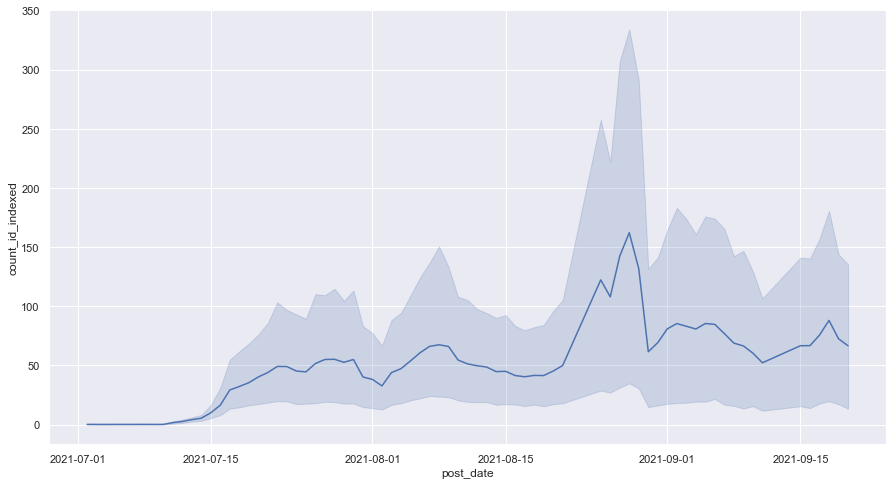

In [59]:
sns.lineplot(data=roles_in_2021[roles_in_2021['post_date'] > pd.to_datetime('2021-07')], x='post_date', y='count_id_indexed')
plt.show()

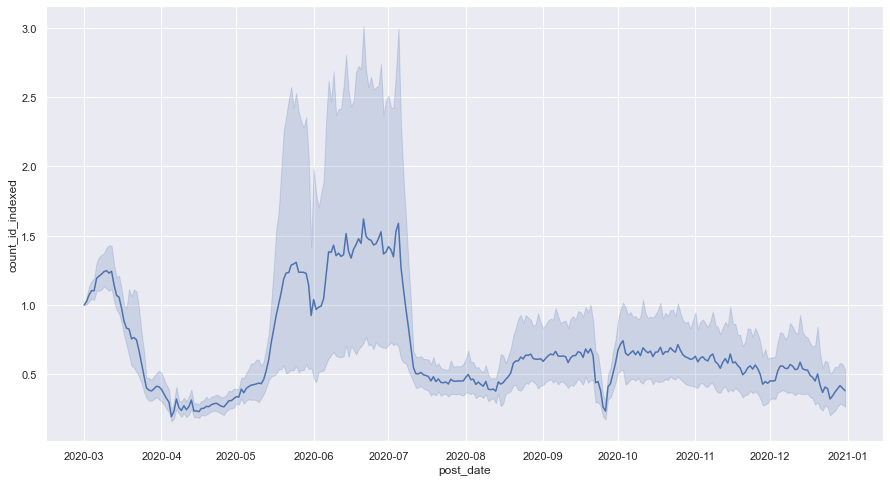

In [61]:
sns.lineplot(data=roles_in_2020[roles_in_2020['post_date'] < pd.to_datetime('2021-07')], x='post_date', y='count_id_indexed')
plt.show()